<a href="https://colab.research.google.com/github/Ana-Ibarra/OpenClassroomProject/blob/master/P6_02_programme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
    import os
    import pickle
    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt
    import keras
    import cv2
    import tensorflow as tf
    from keras.models import model_from_json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fpath = "/content/drive/My Drive/OC_P6_images/"
with open (fpath+'images_squared_split/dog_breeds', 'rb') as fp:
    breeds = pickle.load(fp)
print("Categories-Breeds Loaded")

Categories name Loaded


In [4]:
# Function that adds black rectangles to images in order to conserve
# the Aspect ratio and returns an squared image.
def make_square(im):
    fill_color=(0, 0, 0, 0)
    x, y = im.size
    size = max(x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

In [24]:
# Load the CNN model of classification
model = keras.models.load_model("/content/drive/My Drive/OC_P6_images/saved_models/final_xception.h5")
print("Loaded model from disk")

Loaded model from disk


In [50]:
def xception_predict_breed(image_path):
  original_im = make_square(Image.open(image_path))
  plt.imshow(original_im)
  plt.xticks([])
  plt.yticks([])
  img_array = keras.preprocessing.image.img_to_array(original_im)
  img_array = cv2.resize(img_array,(299,299))
  img_array = tf.expand_dims(img_array, 0) 

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print("This image most likely belongs to '{}'"
      .format(breeds[np.argmax(score)][10:]))

This image most likely belongs to 'Chihuahua'


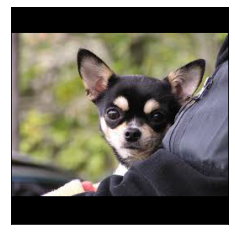

In [61]:
xception_predict_breed("/content/drive/MyDrive/OC_P6_images/descarga.jpg")